In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.titlepad': 20,
         'axes.titlesize': 24,
         'axes.labelpad': 20,
         'axes.labelsize': 20,
         'lines.linewidth': 3,
         'lines.markersize': 10,
         'xtick.labelsize': 16,
         'ytick.labelsize': 16}
plt.rcParams.update(params)
sns.color_palette("bright")

pd.set_option('display.max_rows', 500)

## Becas Doctorado Nacional

In [2]:
conicyt = pd.read_csv('data/tabular/conicyt doctorado nacional 2003-2017.csv')
conicyt.head()

,año,n_concursados,n_aprobados
0,2003,333,140
1,2004,477,200
2,2005,528,220
3,2006,674,332
4,2007,930,420


In [3]:
conicyt=conicyt.rename(columns = {'año':'Año', 'n_concursados':'Concursados', 'n_aprobados':'Aprobados'})
conicyt['Tasa de aprobación']=np.round(conicyt['Aprobados']/conicyt['Concursados']*100,decimals=1)
conicyt_postdoc=conicyt.copy()
conicyt.head()

,Año,Concursados,Aprobados,Tasa de aprobación
0,2003,333,140,42.0
1,2004,477,200,41.9
2,2005,528,220,41.7
3,2006,674,332,49.3
4,2007,930,420,45.2


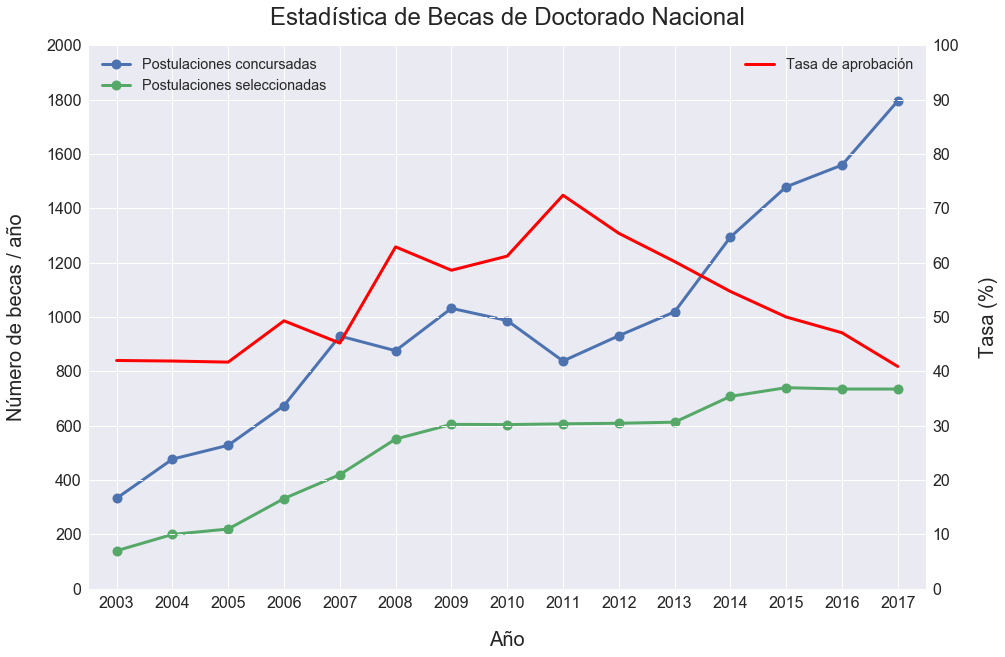

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

conicyt.plot(kind='line', x='Año', y='Concursados', marker='o', markersize=10, ax=ax, label='Postulaciones concursadas')
conicyt.plot(kind='line', x='Año', y='Aprobados', marker='o', markersize=10, ax=ax, label='Postulaciones seleccionadas')
ax.set_xlim([2002.5,2017.5])
ax.set_ylim([0,2000])
ax.yaxis.set_ticks(np.arange(0, 2100, 200))
ax.legend(loc=2)

conicyt.plot(kind='line', x='Año', y='Tasa de aprobación', color='red', grid=True, ax=ax2)
ax2.set_ylim([0,100])
ax2.yaxis.set_ticks(np.arange(0,110,10))
ax2.set_xlim([2002.5,2017.5])
ax2.xaxis.set_ticks(np.arange(2003, 2018, 1))
ax2.grid(linestyle='--')
ax2.legend(loc=1)

ax.set_title('Estadística de Becas de Doctorado Nacional')
ax.set_ylabel('Número de becas / año')
ax2.set_ylabel('Tasa (%)')

fig.savefig('figures/estadistica_becas_doctorado_nacional.pdf')
fig.savefig('figures/estadistica_becas_doctorado_nacional.png')

## Becas Conicyt de Doctorado Nacional e Internacional

Fuente: http://www.conicyt.cl/becasconicyt/estadisticas/seleccionados/

In [6]:
conicyt_doctorado = pd.read_csv('data/tabular/conicyt doctorado 2003-2017.csv')
conicyt_doctorado.head()

,año,doctorado_nacional,doctorado_extranjeros,doctorado_conicyt_internacional,doctorado_bpr_internacional,doctorado_becas_chile
0,2003,140,NaN,38.0,84.0,NaN
1,2004,204,NaN,38.0,82.0,NaN
2,2005,222,3.0,49.0,81.0,NaN
3,2006,311,30.0,111.0,86.0,NaN
4,2007,432,NaN,151.0,131.0,NaN


In [7]:
conicyt_doctorado=conicyt_doctorado.rename(columns = {'año':'Año'})
conicyt_doctorado['Aprobados']=conicyt_doctorado.iloc[:,1:6].sum(axis=1)
conicyt_doctorado.head()

,Año,doctorado_nacional,doctorado_extranjeros,doctorado_conicyt_internacional,doctorado_bpr_internacional,doctorado_becas_chile,Aprobados
0,2003,140,NaN,38.0,84.0,NaN,262.0
1,2004,204,NaN,38.0,82.0,NaN,324.0
2,2005,222,3.0,49.0,81.0,NaN,355.0
3,2006,311,30.0,111.0,86.0,NaN,538.0
4,2007,432,NaN,151.0,131.0,NaN,714.0


In [8]:
mineduc_doctorado=pd.read_csv("data/tabular/mineduc doctorado 2003-2017.csv")
mineduc_doctorado.head()

,año,matriculados
0,2003,1731.0
1,2004,2031.0
2,2005,2509.0
3,2006,2753.0
4,2007,3029.0


In [9]:
mineduc_doctorado=mineduc_doctorado.rename(columns = {'año':'Año', 'matriculados':'Matriculados'})
mineduc_doctorado.head()

,Año,Matriculados
0,2003,1731.0
1,2004,2031.0
2,2005,2509.0
3,2006,2753.0
4,2007,3029.0


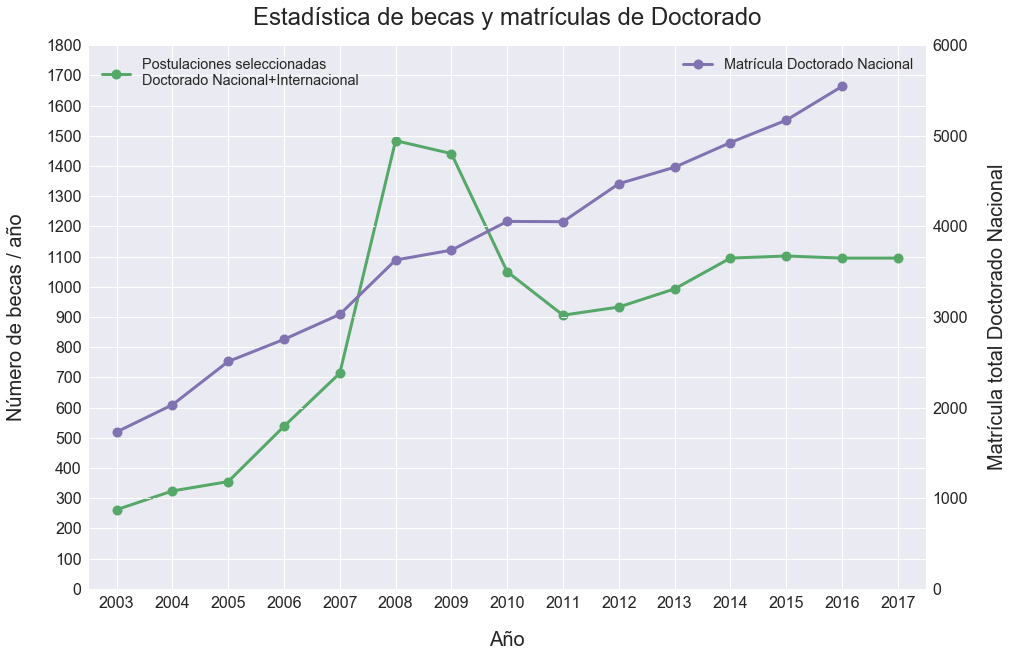

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
current_palette = sns.color_palette()

conicyt_doctorado.plot(kind='line', x='Año', y='Aprobados', marker='o', markersize=10, color=current_palette[1], ax=ax, label='Postulaciones seleccionadas\nDoctorado Nacional+Internacional')
ax.set_xlim([2002.5,2017.5])
ax.set_ylim([0,1800])
ax.yaxis.set_ticks(np.arange(0, 1900, 100))
ax.legend(loc=2)

mineduc_doctorado.plot(kind='line', x='Año', y='Matriculados', marker='o', markersize=10, color=current_palette[3], grid=True, ax=ax2, label='Matrícula Doctorado Nacional')
ax2.set_ylim([0,6000])
ax2.set_xlim([2002.5,2017.5])
ax2.xaxis.set_ticks(np.arange(2003, 2018, 1))
ax2.grid(linestyle='--')
ax2.legend(loc=1)

ax.set_title('Estadística de becas y matrículas de Doctorado')
ax.set_ylabel('Número de becas / año')
ax2.set_ylabel('Matrícula total Doctorado Nacional')

fig.savefig('figures/estadistica_becas_doctorado_nacional_internacional.pdf')
fig.savefig('figures/estadistica_becas_doctorado_nacional_internacional.png')